  **Basic Libraries & Packages**

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics.pairwise import cosine_similarity
from sklearn.feature_extraction.text import CountVectorizer
import os
from scipy.sparse import coo_matrix


In [ ]:
pip install kaggle

In [ ]:
!mkdir -p ~/.kaggle
!cp kaggle.json ~/.kaggle/
!chmod 600 ~/.kaggle/kaggle.json

cp: cannot stat 'kaggle.json': No such file or directory
chmod: cannot access '/root/.kaggle/kaggle.json': No such file or directory


In [ ]:
!kaggle datasets download -d yasserh/walmart-dataset

Dataset URL: https://www.kaggle.com/datasets/yasserh/walmart-dataset
License(s): CC0-1.0
  0% 0.00/122k [00:00<?, ?B/s]
100% 122k/122k [00:00<00:00, 10.4MB/s]


In [ ]:
from zipfile import ZipFile
dataset = '/content/walmart-dataset.zip'
with ZipFile(dataset, 'r') as zip:
  zip.extractall()
  print('the dataset is extracted')

the dataset is extracted


In [ ]:
train_data = pd.read_csv('/content/output (1).csv')
train_data.columns

Index([' Uniq Id', 'Crawl Timestamp', 'Dataset Origin', 'Product Id',
       'Product Barcode', 'Product Company Type Source',
       'Product Brand Source', 'Product Brand Normalised Source',
       'Product Name Source', 'Match Rank', 'Match Score', 'Match Type',
       'Retailer', 'Product Category', 'Product Brand', 'Product Name',
       'Product Price', 'Sku', 'Upc', 'Product Url', 'Market',
       'Product Description', 'Product Currency',
       'Product Available Inventory', 'Product Image Url',
       'Product Model Number', 'Product Tags', 'Product Contents',
       'Product Rating', 'Product Reviews Count', 'Bsr', 'Joining Key'],
      dtype='object')

In [ ]:

print(train_data.columns)


train_data = train_data[[' Uniq Id', 'Product Id', 'Product Rating', 'Product Reviews Count',
                         'Product Category', 'Product Brand', 'Product Name',
                         'Product Image Url', 'Product Description', 'Product Tags']]


train_data.head(3)

Index([' Uniq Id', 'Crawl Timestamp', 'Dataset Origin', 'Product Id',
       'Product Barcode', 'Product Company Type Source',
       'Product Brand Source', 'Product Brand Normalised Source',
       'Product Name Source', 'Match Rank', 'Match Score', 'Match Type',
       'Retailer', 'Product Category', 'Product Brand', 'Product Name',
       'Product Price', 'Sku', 'Upc', 'Product Url', 'Market',
       'Product Description', 'Product Currency',
       'Product Available Inventory', 'Product Image Url',
       'Product Model Number', 'Product Tags', 'Product Contents',
       'Product Rating', 'Product Reviews Count', 'Bsr', 'Joining Key'],
      dtype='object')


,Uniq Id,Product Id,Product Rating,Product Reviews Count,Product Category,Product Brand,Product Name,Product Image Url,Product Description,Product Tags
0,1705736792d82aa2f2d3caf1c07c53f4,2e17bf4acecdece67fc00f07ad62c910,NaN,NaN,Premium Beauty > Premium Makeup > Premium Nail...,OPI,"OPI Infinite Shine, Nail Lacquer Nail Polish, ...",https://i5.walmartimages.com/asr/0e1f4c51-c1a4...,NaN,"OPI Infinite Shine, Nail Lacquer Nail Polish, ..."
1,95a9fe6f4810fcfc7ff244fd06784f11,076e5854a62dd283c253d6bae415af1f,NaN,NaN,Beauty > Hair Care > Hair Color > Auburn Hair ...,Nice'n Easy,"Nice n Easy Permanent Color, 111 Natural Mediu...",https://i5.walmartimages.com/asr/9c8e42e4-13a5...,Pack of 3 Pack of 3 for the UPC: 381519000201 ...,"Nice 'n Easy Permanent Color, 111 Natural Medi..."
2,8d4d0330178d3ed181b15a4102b287f2,8a4fe5d9c7a6ed26cc44d785a454b124,4.5,29221.0,Beauty > Hair Care > Hair Color > Permanent Ha...,Clairol,Clairol Nice N Easy Permanent Color 7/106A Nat...,https://i5.walmartimages.com/asr/e3a601c2-6a2b...,This Clairol Nice N Easy Permanent Color gives...,Clairol Nice 'N Easy Permanent Color 7/106A Na...


In [ ]:
train_data['Product Tags']

0       OPI Infinite Shine, Nail Lacquer Nail Polish, ...
1       Nice 'n Easy Permanent Color, 111 Natural Medi...
2       Clairol Nice 'N Easy Permanent Color 7/106A Na...
3       Kokie Professional Matte Lipstick, Hot Berry, ...
4       Gillette TRAC II Plus Razor Blade Refills, Fit...
                              ...                        
4258    3D Bath Spa Pillow Cushion Comfort Neck & Back...
4259    Rimmel BB Cream Matte, Medium, 1 oz, Wal-mart,...
4260    Australian Gold Sunscreen High Strength SPF 15...
4261    Physicians Formula Shimmer Strips Custom Bronz...
4262                                                  NaN
Name: Product Tags, Length: 4263, dtype: object

In [ ]:
train_data.shape

(4263, 10)

In [ ]:
train_data.isnull().sum()

 Uniq Id                    0
Product Id                  0
Product Rating           2330
Product Reviews Count    1352
Product Category           10
Product Brand               7
Product Name                0
Product Image Url           0
Product Description       934
Product Tags                1
dtype: int64

In [ ]:
train_data['Product Reviews Count'].fillna(0, inplace=True)

In [ ]:
train_data['Product Rating'].fillna(0, inplace=True)
train_data['Product Category'].fillna(0, inplace=True)
train_data['Product Brand'].fillna(0, inplace=True)
train_data['Product Description'].fillna(0, inplace=True)

In [ ]:
train_data.isnull().sum()

 Uniq Id                 0
Product Id               0
Product Rating           0
Product Reviews Count    0
Product Category         0
Product Brand            0
Product Name             0
Product Image Url        0
Product Description      0
Product Tags             1
dtype: int64

In [ ]:
train_data.duplicated().sum()

0

In [ ]:
#make columns Shorter
#Define the mapping of current column names to shorter names
column_name_mapping = {
    ' Uniq Id' : 'ID',
    'Product Id' : 'ProdID',
    'Product Rating' : 'Rating',
    'Product Reviews Count' : 'ReviewCount',
    'Product Category' : 'Category',
    'Product Brand' : 'Brand',
    'Product Name' : 'Name',
    'Product Image Url' : 'ImageURL',
    'Product Description' : 'Description',
    'Product Tags' : 'Tags',
    'Product Contents' : 'Contents'



}
train_data.rename(columns=column_name_mapping, inplace=True)

In [ ]:
train_data['ID'] = train_data['ID'].str.extract(r'(\d+)').astype(float)
train_data['ProdID'] = train_data['ProdID'].str.extract(r'(\d+)').astype(float)

**EDA (Exploratory Data Analysis)**

In [ ]:
#Basic statistics
num_users = train_data['ID'].nunique()
num_items = train_data['ProdID'].nunique()
num_ratings = train_data['Rating'].nunique()
print(f"Numbers of unique users: {num_users}")
print(f"Numbers of unique items: {num_items}")
print(f"Numbers of unique ratings: {num_ratings}")


Numbers of unique users: 1518
Numbers of unique items: 1485
Numbers of unique ratings: 36


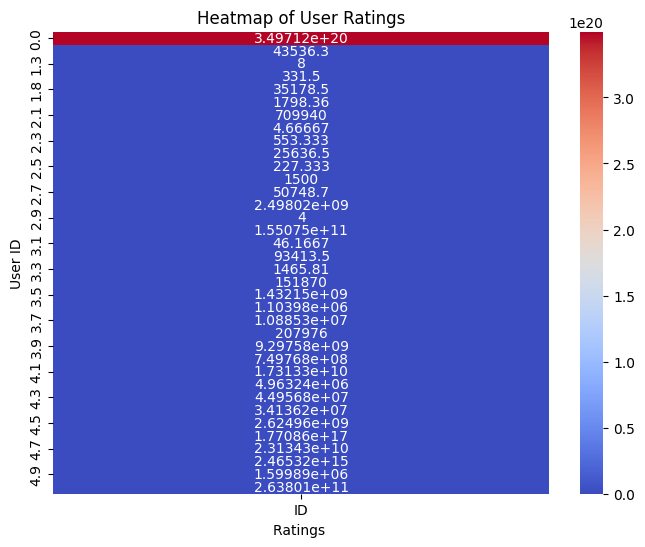

In [ ]:
heatmap_data = train_data.pivot_table('ID', 'Rating')

plt.figure(figsize=(8, 6))
sns.heatmap(heatmap_data, annot=True, fmt='g', cmap='coolwarm', cbar=True)
plt.title('Heatmap of User Ratings')
plt.xlabel('Ratings ')
plt.ylabel('User ID')
plt.show()

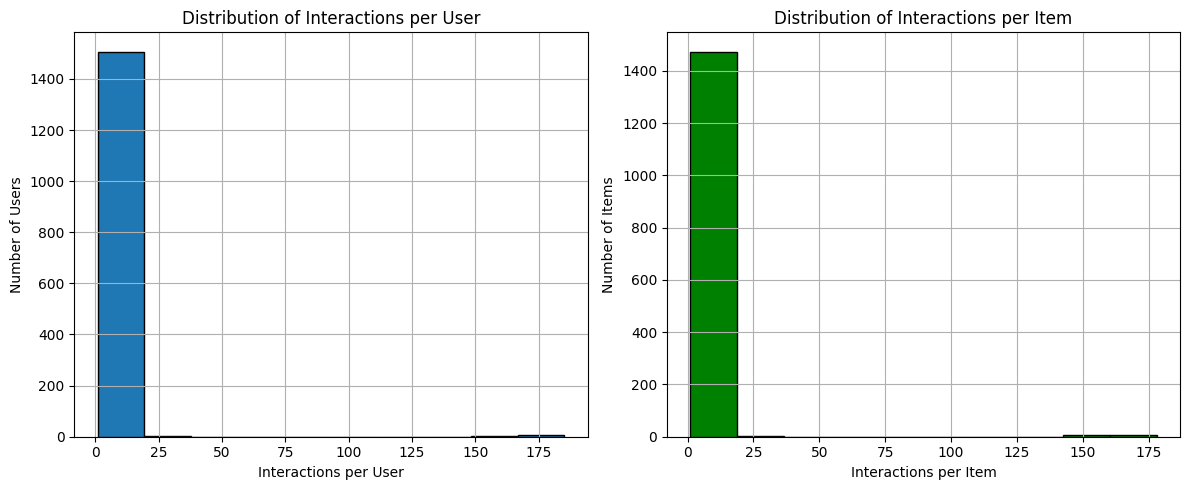

In [ ]:

# Distribution of interactions
plt.figure(figsize=(12, 5))
plt.subplot(1, 2, 1)
train_data['ID'].value_counts().hist(bins=10, edgecolor='k')
plt.xlabel('Interactions per User')
plt.ylabel('Number of Users')
plt.title('Distribution of Interactions per User')

plt.subplot(1, 2, 2)
train_data['ProdID'].value_counts().hist(bins=10, edgecolor='k',color='green')
plt.xlabel('Interactions per Item')
plt.ylabel('Number of Items')
plt.title('Distribution of Interactions per Item')

plt.tight_layout()
plt.show()

Text(0.5, 1.0, 'Most Popular items')

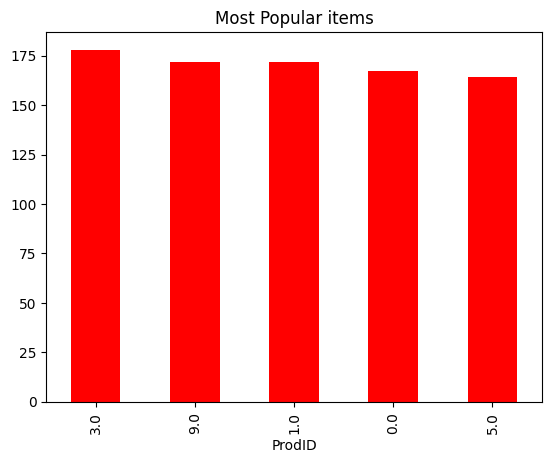

In [ ]:
# Most popular items
popular_items = train_data['ProdID'].value_counts().head(5)
popular_items.plot(kind='bar',color='red')
plt.title("Most Popular items")

<Axes: xlabel='Rating'>

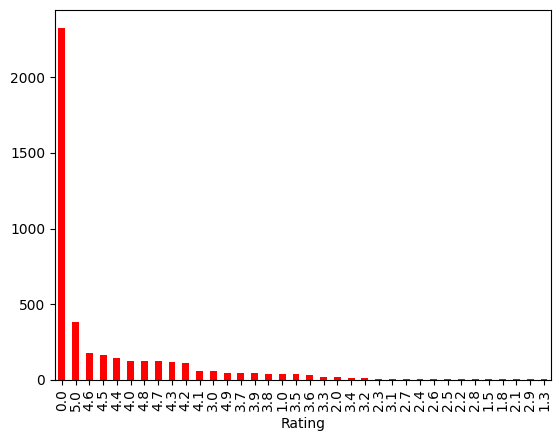

In [ ]:
# most rated counts
train_data['Rating'].value_counts().plot(kind='bar',color='red')

**Data Cleaning And Tags Creations**

In [ ]:
import spacy
from spacy.lang.en.stop_words import STOP_WORDS

nlp = spacy.load("en_core_web_sm")

def clean_and_extract_tags(text):
    if isinstance(text, str): # Check if the input is a string
        doc = nlp(text.lower())
        tags = [token.text for token in doc if token.text.isalnum() and token.text not in STOP_WORDS]
        return ', '.join(tags)
    else:
        return '' # Return empty string if not a string

columns_to_extract_tags_from = ['Category', 'Brand', 'Description']

for column in columns_to_extract_tags_from:
    train_data[column] = train_data[column].apply(clean_and_extract_tags)

In [ ]:
train_data['Tags'] = train_data[columns_to_extract_tags_from].apply(lambda row: ', '.join(row), axis=1)

In [ ]:
train_data

,ID,ProdID,Rating,ReviewCount,Category,Brand,Name,ImageURL,Description,Tags
0,1.705737e+09,2.000000e+00,0.0,0.0,"premium, beauty, premium, makeup, premium, nai...",opi,"OPI Infinite Shine, Nail Lacquer Nail Polish, ...",https://i5.walmartimages.com/asr/0e1f4c51-c1a4...,,"premium, beauty, premium, makeup, premium, nai..."
1,9.500000e+01,7.600000e+01,0.0,0.0,"beauty, hair, care, hair, color, auburn, hair,...",easy,"Nice n Easy Permanent Color, 111 Natural Mediu...",https://i5.walmartimages.com/asr/9c8e42e4-13a5...,"pack, 3, pack, 3, upc, 381519000201, beautiful...","beauty, hair, care, hair, color, auburn, hair,..."
2,8.000000e+00,8.000000e+00,4.5,29221.0,"beauty, hair, care, hair, color, permanent, ha...",clairol,Clairol Nice N Easy Permanent Color 7/106A Nat...,https://i5.walmartimages.com/asr/e3a601c2-6a2b...,"clairol, nice, n, easy, permanent, color, give...","beauty, hair, care, hair, color, permanent, ha..."
3,4.000000e+00,3.000000e+00,0.0,0.0,"beauty, makeup, lip","kokie, cosmetics","Kokie Professional Matte Lipstick, Hot Berry, ...",https://i5.walmartimages.com/asr/25b4b467-bc61...,"calling, matte, lip, lovers, indulge, rich, cr...","beauty, makeup, lip, kokie, cosmetics, calling..."
4,9.900000e+02,3.000000e+00,0.0,131.0,"seasonal, stock, essentials, personal, care, s...",gillette,"Gillette TRAC II Plus Razor Blade Refills, Fit...",https://i5.walmartimages.com/asr/1a2ebb06-cd01...,"1971, gillette, introduced, trac, ii, razor, s...","seasonal, stock, essentials, personal, care, s..."
...,...,...,...,...,...,...,...,...,...,...
4258,8.000000e+00,7.561500e+04,0.0,0.0,"personal, care, bath, body, loofahs, bath, spo...",singes,3D Bath Spa Pillow Cushion Comfort Neck & Back...,https://i5.walmartimages.com/asr/586a6bbc-da67...,"item, specifics, type, spa, bath, pillow, mate...","personal, care, bath, body, loofahs, bath, spo..."
4259,8.000000e+01,7.820000e+03,3.1,12.0,"beauty, makeup, face, makeup, bb, cream, rimme...",rimmel,"Rimmel BB Cream Matte, Medium, 1 oz",https://i5.walmartimages.com/asr/333cf112-59c6...,"bb, cream, matte, packed, matte, perfecting, b...","beauty, makeup, face, makeup, bb, cream, rimme..."
4260,8.000000e+00,3.580252e+10,4.9,58.0,"personal, care, sun, care, sunscreen","australian, gold",Australian Gold Sunscreen High Strength SPF 15...,https://i5.walmartimages.com/asr/56decb3b-9284...,"australian, gold, sunscreen, high, strength, s...","personal, care, sun, care, sunscreen, australi..."
4261,2.220000e+03,2.200000e+01,0.0,2.0,"beauty, makeup, face, makeup, bronzer, bronzin...","physicians, formula",Physicians Formula Shimmer Strips Custom Bronz...,https://i5.walmartimages.com/asr/553ac928-e0d0...,"glow, ve, missing, highlight, skin, luminous, ...","beauty, makeup, face, makeup, bronzer, bronzin..."


**Rating Base Recommendation System**

In [ ]:
average_ratings = train_data.groupby(['Name','ReviewCount','Brand','ImageURL'])['Rating'].mean().reset_index()

In [ ]:
top_rated_items = average_ratings.sort_values(by='Rating', ascending=False)

rating_base_recommendation = top_rated_items.head(10)

In [ ]:
rating_base_recommendation['Rating'] = rating_base_recommendation['Rating'].astype(int)
rating_base_recommendation['ReviewCount'] = rating_base_recommendation['ReviewCount'].astype(int)


<ipython-input-29-14a31ed65ba8>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  rating_base_recommendation['Rating'] = rating_base_recommendation['Rating'].astype(int)
<ipython-input-29-14a31ed65ba8>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  rating_base_recommendation['ReviewCount'] = rating_base_recommendation['ReviewCount'].astype(int)


In [ ]:
rating_base_recommendation

,Name,ReviewCount,Brand,ImageURL,Rating
4014,Vega Chlorella Dietary Supplement Powder 5.3 o...,1,vega,https://i5.walmartimages.com/asr/e8ddd649-4959...,5
3069,Panama Jack SPF 45 Lip Balm - Broad Spectrum U...,1,"panama, jack",https://i5.walmartimages.com/asr/fd8225c9-f7c3...,5
1,($100 Value) Peter Thomas Roth Thermal Therapy...,1,"peter, thomas, roth",https://i5.walmartimages.com/asr/ecd851ef-6ca7...,5
3986,VALENCIA ORANGE WAX MELT 2.7 oz by Aromatique,1,aromatique,https://i5.walmartimages.com/asr/8972ea1a-6e66...,5
2134,LOreal Excellence Creme - 9-1/2NB Lightest Nat...,1,paris,https://i5.walmartimages.com/asr/bb42a499-2881...,5
3667,Simply Smooth 8686183 By Simply Smooth Xtend K...,3,"simply, smooth",https://i5.walmartimages.com/asr/8203fc30-16a4...,5
3993,Vagisil Anti-Itch Medicated Wipes 20 Each (Pac...,1,vagisil,https://i5.walmartimages.com/asr/9a7992bb-cab9...,5
3664,"Simple Green Non-Abrasive Stone Cleaner, Unsce...",3,"simple, green",https://i5.walmartimages.com/asr/880d9b12-16ae...,5
1084,Clubman Pinaud Styptic Pencil,1,"clubman, pinaud",https://i5.walmartimages.com/asr/a8f0f352-dacb...,5
1086,Clubman Reserve Brandy Spice After Shave Lotio...,1,"clubman, pinaud",https://i5.walmartimages.com/asr/17fef557-62c0...,5


In [ ]:
print("Rating Base Recommendation System: (Trending Products)")
rating_base_recommendation[['Name','Rating','ReviewCount','Brand','ImageURL']] = rating_base_recommendation[['Name','Rating','ReviewCount','Brand','ImageURL']]

Rating Base Recommendation System: (Trending Products)


<ipython-input-31-236f384e800d>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  rating_base_recommendation[['Name','Rating','ReviewCount','Brand','ImageURL']] = rating_base_recommendation[['Name','Rating','ReviewCount','Brand','ImageURL']]


In [ ]:
rating_base_recommendation

,Name,ReviewCount,Brand,ImageURL,Rating
4014,Vega Chlorella Dietary Supplement Powder 5.3 o...,1,vega,https://i5.walmartimages.com/asr/e8ddd649-4959...,5
3069,Panama Jack SPF 45 Lip Balm - Broad Spectrum U...,1,"panama, jack",https://i5.walmartimages.com/asr/fd8225c9-f7c3...,5
1,($100 Value) Peter Thomas Roth Thermal Therapy...,1,"peter, thomas, roth",https://i5.walmartimages.com/asr/ecd851ef-6ca7...,5
3986,VALENCIA ORANGE WAX MELT 2.7 oz by Aromatique,1,aromatique,https://i5.walmartimages.com/asr/8972ea1a-6e66...,5
2134,LOreal Excellence Creme - 9-1/2NB Lightest Nat...,1,paris,https://i5.walmartimages.com/asr/bb42a499-2881...,5
3667,Simply Smooth 8686183 By Simply Smooth Xtend K...,3,"simply, smooth",https://i5.walmartimages.com/asr/8203fc30-16a4...,5
3993,Vagisil Anti-Itch Medicated Wipes 20 Each (Pac...,1,vagisil,https://i5.walmartimages.com/asr/9a7992bb-cab9...,5
3664,"Simple Green Non-Abrasive Stone Cleaner, Unsce...",3,"simple, green",https://i5.walmartimages.com/asr/880d9b12-16ae...,5
1084,Clubman Pinaud Styptic Pencil,1,"clubman, pinaud",https://i5.walmartimages.com/asr/a8f0f352-dacb...,5
1086,Clubman Reserve Brandy Spice After Shave Lotio...,1,"clubman, pinaud",https://i5.walmartimages.com/asr/17fef557-62c0...,5


In [ ]:
rating_base_recommendation

,Name,ReviewCount,Brand,ImageURL,Rating
4014,Vega Chlorella Dietary Supplement Powder 5.3 o...,1,vega,https://i5.walmartimages.com/asr/e8ddd649-4959...,5
3069,Panama Jack SPF 45 Lip Balm - Broad Spectrum U...,1,"panama, jack",https://i5.walmartimages.com/asr/fd8225c9-f7c3...,5
1,($100 Value) Peter Thomas Roth Thermal Therapy...,1,"peter, thomas, roth",https://i5.walmartimages.com/asr/ecd851ef-6ca7...,5
3986,VALENCIA ORANGE WAX MELT 2.7 oz by Aromatique,1,aromatique,https://i5.walmartimages.com/asr/8972ea1a-6e66...,5
2134,LOreal Excellence Creme - 9-1/2NB Lightest Nat...,1,paris,https://i5.walmartimages.com/asr/bb42a499-2881...,5
3667,Simply Smooth 8686183 By Simply Smooth Xtend K...,3,"simply, smooth",https://i5.walmartimages.com/asr/8203fc30-16a4...,5
3993,Vagisil Anti-Itch Medicated Wipes 20 Each (Pac...,1,vagisil,https://i5.walmartimages.com/asr/9a7992bb-cab9...,5
3664,"Simple Green Non-Abrasive Stone Cleaner, Unsce...",3,"simple, green",https://i5.walmartimages.com/asr/880d9b12-16ae...,5
1084,Clubman Pinaud Styptic Pencil,1,"clubman, pinaud",https://i5.walmartimages.com/asr/a8f0f352-dacb...,5
1086,Clubman Reserve Brandy Spice After Shave Lotio...,1,"clubman, pinaud",https://i5.walmartimages.com/asr/17fef557-62c0...,5


**Content Base Recommendation system(User Preferences or Items similarities)**

In [ ]:
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.metrics.pairwise import cosine_similarity

tfidf_vectorizer = TfidfVectorizer(stop_words='english')
tfidf_matrix_content = tfidf_vectorizer.fit_transform(train_data['Tags'])
cosine_similarities_content = cosine_similarity(tfidf_matrix_content,tfidf_matrix_content)

In [ ]:
cosine_similarities_content

array([[1.        , 0.00343258, 0.00360588, ..., 0.00206207, 0.01264552,
        0.        ],
       [0.00343258, 1.        , 0.37882544, ..., 0.02871119, 0.03146043,
        0.02967732],
       [0.00360588, 0.37882544, 1.        , ..., 0.00844635, 0.01728197,
        0.03887373],
       ...,
       [0.00206207, 0.02871119, 0.00844635, ..., 1.        , 0.02014427,
        0.00204526],
       [0.01264552, 0.03146043, 0.01728197, ..., 0.02014427, 1.        ,
        0.02223695],
       [0.        , 0.02967732, 0.03887373, ..., 0.00204526, 0.02223695,
        1.        ]])

In [ ]:
train_data.head(2)

,ID,ProdID,Rating,ReviewCount,Category,Brand,Name,ImageURL,Description,Tags
0,1.705737e+09,2.0,0.0,0.0,"premium, beauty, premium, makeup, premium, nai...",opi,"OPI Infinite Shine, Nail Lacquer Nail Polish, ...",https://i5.walmartimages.com/asr/0e1f4c51-c1a4...,,"premium, beauty, premium, makeup, premium, nai..."
1,9.500000e+01,76.0,0.0,0.0,"beauty, hair, care, hair, color, auburn, hair,...",easy,"Nice n Easy Permanent Color, 111 Natural Mediu...",https://i5.walmartimages.com/asr/9c8e42e4-13a5...,"pack, 3, pack, 3, upc, 381519000201, beautiful...","beauty, hair, care, hair, color, auburn, hair,..."


In [ ]:
train_data['Name'][0]

'OPI Infinite Shine, Nail Lacquer Nail Polish, Bubble Bath'

In [ ]:
item_name = 'OPI Infinite Shine, Nail Lacquer Nail Polish, Bubble Bath'
item_index = train_data[train_data['Name']==item_name].index[0]

In [ ]:
similar_items = list(enumerate(cosine_similarities_content[item_index]))

In [ ]:
similar_items = sorted(similar_items, key=lambda x:x[1], reverse=True)
top_similar_items = similar_items[1:10]

recommended_items_indices = [x[0] for x in top_similar_items]

In [ ]:
train_data.iloc[recommended_items_indices][['Name','ReviewCount','Brand']]

,Name,ReviewCount,Brand
156,OPI Nail Lacquer Polish .5oz/15mL - This Gown ...,0.0,opi
184,OPI Nail Gel Polish GelColor .5oz/15mL 3 CT Co...,0.0,opi
205,OPI Nail Lacquer - Dont Bossa Nova Me Around -...,0.0,opi
237,OPI Infinite Shine 2 Polish - ISL P33 - Alpaca...,5.0,opi
325,OPI Gel Polish Fall 2019 Scotland Collection G...,1.0,opi
375,OPI Nail Gel Polish GelColor .5oz/15mL 3 CT Co...,1.0,opi
402,"OPI Nail Polish, Strawberry Margarita, 0.5 Fl Oz",57.0,opi
706,OPI Nail Gel Polish GelColor .5oz/15mL 3 CT Co...,1.0,opi
886,OPI- Nail Lacquer-GelColor - &quotLiv&quotin t...,0.0,opi


**Function To Recommend Products For Content Base**

In [ ]:
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.metrics.pairwise import cosine_similarity

def content_based_recommendations(train_data, item_name, top_n=10):
    # Check if the item name exists in the training data
    if item_name not in train_data['Name'].values:
        print(f"Item '{item_name}' not found in the training data.")
        return pd.DataFrame()

    # Create a TF-IDF vectorizer for item descriptions
    tfidf_vectorizer = TfidfVectorizer(stop_words='english')

    # Apply TF-IDF vectorization to item descriptions
    tfidf_matrix_content = tfidf_vectorizer.fit_transform(train_data['Tags'])

    # Calculate cosine similarity between items based on descriptions
    cosine_similarities_content = cosine_similarity(tfidf_matrix_content, tfidf_matrix_content)

    # Find the index of the item
    item_index = train_data[train_data['Name'] == item_name].index[0]

    # Get the cosine similarity scores for the item
    similar_items = list(enumerate(cosine_similarities_content[item_index]))

    # Sort similar items by similarity score in descending order
    similar_items = sorted(similar_items, key=lambda x: x[1], reverse=True)

    # Get the top N most similar items (excluding the item itself)
    top_similar_items = similar_items[1:top_n+1]

    # Get the indices of the top similar items
    recommended_item_indices = [x[0] for x in top_similar_items]

    # Get the details of the top similar items
    recommended_items_details = train_data.iloc[recommended_item_indices][['Name', 'ReviewCount', 'Brand', 'ImageURL', 'Rating']]

    return recommended_items_details

In [ ]:
# Example: Get content-based recommendations for a specific item
item_name = 'OPI Infinite Shine, Nail Lacquer Nail Polish, Bubble Bath'
content_based_rec = content_based_recommendations(train_data, item_name, top_n=8)

content_based_rec

,Name,ReviewCount,Brand,ImageURL,Rating
156,OPI Nail Lacquer Polish .5oz/15mL - This Gown ...,0.0,opi,https://i5.walmartimages.com/asr/71caed3f-5f83...,0.0
184,OPI Nail Gel Polish GelColor .5oz/15mL 3 CT Co...,0.0,opi,https://i5.walmartimages.com/asr/2d6f5147-53a8...,0.0
205,OPI Nail Lacquer - Dont Bossa Nova Me Around -...,0.0,opi,https://i5.walmartimages.com/asr/fd1195d2-8d8d...,0.0
237,OPI Infinite Shine 2 Polish - ISL P33 - Alpaca...,5.0,opi,https://i5.walmartimages.com/asr/7426eb5c-1690...,0.0
325,OPI Gel Polish Fall 2019 Scotland Collection G...,1.0,opi,https://i5.walmartimages.com/asr/79bbbd9f-9a89...,0.0
375,OPI Nail Gel Polish GelColor .5oz/15mL 3 CT Co...,1.0,opi,https://i5.walmartimages.com/asr/744e869c-3500...,5.0
402,"OPI Nail Polish, Strawberry Margarita, 0.5 Fl Oz",57.0,opi,https://i5.walmartimages.com/asr/b95676e5-96ab...,4.4
706,OPI Nail Gel Polish GelColor .5oz/15mL 3 CT Co...,1.0,opi,https://i5.walmartimages.com/asr/c7ba4815-52f7...,5.0


**Collaborative Filtering (User Item Similarity)**

In [ ]:
user_item_matrix = train_data.pivot_table(index='ID', columns='ProdID', values='Rating',aggfunc='mean').fillna(0).astype(int)

In [ ]:
user_similarity = cosine_similarity(user_item_matrix)

In [ ]:
target_user_id = 4
target_user_index = user_item_matrix.index.get_loc(target_user_id)

In [ ]:
user_similarities = user_similarity[target_user_index]

similar_user_indices = user_similarities.argsort()[::-1][1:]

In [ ]:
recommend_items = []

for user_index in similar_user_indices:
    rated_by_similar_user = user_item_matrix.iloc[user_index]
    not_rated_by_target_user = (rated_by_similar_user==0) & (user_item_matrix.iloc[target_user_index]==0)

    recommend_items.extend(user_item_matrix.columns[not_rated_by_target_user][:10])

recommended_items_details = train_data[train_data['ProdID'].isin(recommend_items)][['Name','ReviewCount','Brand','ImageURL','Rating']]

In [ ]:
recommended_items_details.head(10)

,Name,ReviewCount,Brand,ImageURL,Rating
15,Clairol Natural Instincts Demi-Permanent Hair ...,2935.0,clairol,https://i5.walmartimages.com/asr/00a6e54a-e431...,3.7
33,"DenTek Kids Fun Flossers, Removes Food & Plaqu...",3.0,dentek,https://i5.walmartimages.com/asr/de6e52eb-6e18...,0.0
61,"COVERGIRL Exhibitionist Cream Lipstick, 395 Da...",713.0,covergirl,https://i5.walmartimages.com/asr/95076ec0-ffbd...,4.3
64,Neutrogena SkinClearing Oil-Free Liquid Founda...,741.0,neutrogena,https://i5.walmartimages.com/asr/fd4d78d8-310a...,4.2
69,Design Essentials Natural Coconut & Monoi Curl...,1.0,"design, essentials",https://i5.walmartimages.com/asr/ff2dba1d-0c02...,5.0
78,"Paul Sebastian Fine Cologne Spray, Cologne for...",28.0,"paul, sebastian",https://i5.walmartimages.com/asr/03d08a07-18d7...,4.8
85,"BioAstin Hawaiian Astaxanthin, Vegan, 12mg, 75 Ct",3.0,bioastin,https://i5.walmartimages.com/asr/6da9e238-b19e...,5.0
92,"Bytewise Organic Moringa Leaf Powder, 12 Oz",0.0,bytewise,https://i5.walmartimages.com/asr/076f2b3f-fdc3...,0.0
94,Ag Hair Cosmetics Ultradynamics Extra-Firm Fin...,0.0,"ag, hair",https://i5.walmartimages.com/asr/5d217d98-a385...,0.0
108,OPI Nail Dipping Powder Perfection Combo - Liq...,1.0,opi,https://i5.walmartimages.com/asr/ef1607ee-5bdb...,3.0


**Function That Recommends Items**

In [ ]:
def collaborative_filtering_recommendations(train_data, target_user_id, top_n=10):
    # Create the user-item matrix
    user_item_matrix = train_data.pivot_table(index='ID', columns='ProdID', values='Rating', aggfunc='mean').fillna(0)

    # Calculate the user similarity matrix using cosine similarity
    user_similarity = cosine_similarity(user_item_matrix)

    # Find the index of the target user in the matrix
    target_user_index = user_item_matrix.index.get_loc(target_user_id)

    # Get the similarity scores for the target user
    user_similarities = user_similarity[target_user_index]

    # Sort the users by similarity in descending order (excluding the target user)
    similar_users_indices = user_similarities.argsort()[::-1][1:]

    # Generate recommendations based on similar users
    recommended_items = []

    for user_index in similar_users_indices:
        # Get items rated by the similar user but not by the target user
        rated_by_similar_user = user_item_matrix.iloc[user_index]
        not_rated_by_target_user = (rated_by_similar_user == 0) & (user_item_matrix.iloc[target_user_index] == 0)

        # Extract the item IDs of recommended items
        recommended_items.extend(user_item_matrix.columns[not_rated_by_target_user][:top_n])

    # Get the details of recommended items
    recommended_items_details = train_data[train_data['ProdID'].isin(recommended_items)][['Name', 'ReviewCount', 'Brand', 'ImageURL', 'Rating']]

    return recommended_items_details.head(10)

# Example usage
target_user_id = 4
top_n = 5
collaborative_filtering_rec = collaborative_filtering_recommendations(train_data, target_user_id)
print(f"Top {top_n} recommendations for User {target_user_id}:")
collaborative_filtering_rec

Top 5 recommendations for User 4:


,Name,ReviewCount,Brand,ImageURL,Rating
61,"COVERGIRL Exhibitionist Cream Lipstick, 395 Da...",713.0,covergirl,https://i5.walmartimages.com/asr/95076ec0-ffbd...,4.3
85,"BioAstin Hawaiian Astaxanthin, Vegan, 12mg, 75 Ct",3.0,bioastin,https://i5.walmartimages.com/asr/6da9e238-b19e...,5.0
86,LOreal Paris Feria Multi-Faceted Shimmering Pe...,2144.0,paris,https://i5.walmartimages.com/asr/c229026a-2b75...,3.1
108,OPI Nail Dipping Powder Perfection Combo - Liq...,1.0,opi,https://i5.walmartimages.com/asr/ef1607ee-5bdb...,3.0
144,Covidien Curity Maternity Pad Heavy 4.33&quot ...,0.0,covidien,https://i5.walmartimages.com/asr/e4e38217-ed43...,0.0
155,"Crest 3D White Brilliance Mouthwash, Alcohol F...",63.0,crest,https://i5.walmartimages.com/asr/1fcc5525-9ae3...,0.0
174,COVERGIRL Outlast All-Day Moisturizing Lip Col...,36.0,covergirl,https://i5.walmartimages.com/asr/4479896f-c6c4...,0.0
193,"Revlon ColorStay Skinny Liquid Liner, 304 Gree...",70.0,revlon,https://i5.walmartimages.com/asr/aa3b20a6-3d6d...,4.5
212,"Comvita Certified UMF 20+ Manuka Honey, Raw & ...",0.0,comvita,https://i5.walmartimages.com/asr/3cdc1498-a2ac...,0.0
241,"Ahava Mens Mineral Hand Cream, 3.4 Oz",0.0,ahava,https://i5.walmartimages.com/asr/f74e4bb7-47d3...,0.0


**Hybrid Recommendations**

In [ ]:
# Hybrid Recommendations (Combine Content-Based and Collaborative Filtering)
def hybrid_recommendations(train_data,target_user_id, item_name, top_n=10):
    # Get content-based recommendations
    content_based_rec = content_based_recommendations(train_data,item_name, top_n)

    # Get collaborative filtering recommendations
    collaborative_filtering_rec = collaborative_filtering_recommendations(train_data,target_user_id, top_n)

    # Merge and deduplicate the recommendations
    hybrid_rec = pd.concat([content_based_rec, collaborative_filtering_rec]).drop_duplicates()

    return hybrid_rec.head(10)

In [ ]:
# Example usage: Get hybrid recommendations for a specific user and item
target_user_id = 4 # Change this to the user_id you want recommendations for
item_name = "OPI Nail Lacquer Polish .5oz/15mL - This Gown Needs A Crown NL U11"  # Change this to the item name
hybrid_rec = hybrid_recommendations(train_data,target_user_id, item_name, top_n=10)

print(f"Top 10 Hybrid Recommendations for User {target_user_id} and Item '{item_name}':")
hybrid_rec

Top 10 Hybrid Recommendations for User 4 and Item 'OPI Nail Lacquer Polish .5oz/15mL - This Gown Needs A Crown NL U11':


,Name,ReviewCount,Brand,ImageURL,Rating
156,OPI Nail Lacquer Polish .5oz/15mL - This Gown ...,0.0,opi,https://i5.walmartimages.com/asr/71caed3f-5f83...,0.0
184,OPI Nail Gel Polish GelColor .5oz/15mL 3 CT Co...,0.0,opi,https://i5.walmartimages.com/asr/2d6f5147-53a8...,0.0
205,OPI Nail Lacquer - Dont Bossa Nova Me Around -...,0.0,opi,https://i5.walmartimages.com/asr/fd1195d2-8d8d...,0.0
237,OPI Infinite Shine 2 Polish - ISL P33 - Alpaca...,5.0,opi,https://i5.walmartimages.com/asr/7426eb5c-1690...,0.0
325,OPI Gel Polish Fall 2019 Scotland Collection G...,1.0,opi,https://i5.walmartimages.com/asr/79bbbd9f-9a89...,0.0
375,OPI Nail Gel Polish GelColor .5oz/15mL 3 CT Co...,1.0,opi,https://i5.walmartimages.com/asr/744e869c-3500...,5.0
402,"OPI Nail Polish, Strawberry Margarita, 0.5 Fl Oz",57.0,opi,https://i5.walmartimages.com/asr/b95676e5-96ab...,4.4
706,OPI Nail Gel Polish GelColor .5oz/15mL 3 CT Co...,1.0,opi,https://i5.walmartimages.com/asr/c7ba4815-52f7...,5.0
886,OPI- Nail Lacquer-GelColor - &quotLiv&quotin t...,0.0,opi,https://i5.walmartimages.com/asr/98b4194c-e026...,0.0
1042,"OPI GelColor Gel Nail Polish, Dulce De Leche, ...",1.0,opi,https://i5.walmartimages.com/asr/c1b2c370-b2d2...,0.0


In [ ]:
# Example usage: Get hybrid recommendations for a specific user and item
target_user_id = 10 # Change this to the user_id you want recommendations for
item_name = 'Black Radiance Perfect Tone Matte Lip Crème, Succulent Plum'

hybrid_rec = hybrid_recommendations(train_data,target_user_id, item_name, top_n=10)

print(f"Top 10 Hybrid Recommendations for User {target_user_id} and Item '{item_name}':")
hybrid_rec

Top 10 Hybrid Recommendations for User 10 and Item 'Black Radiance Perfect Tone Matte Lip Crème, Succulent Plum':


,Name,ReviewCount,Brand,ImageURL,Rating
896,"Black Radiance Perfect Tone Lip Color, Vintage...",78.0,"black, radiance",https://i5.walmartimages.com/asr/485f26b4-a19a...,4.7
2496,"Black Radiance Perfect Tone Lip Color, Hollywo...",18.0,"black, radiance",https://i5.walmartimages.com/asr/fe3da48f-5142...,4.3
3,"Kokie Professional Matte Lipstick, Hot Berry, ...",0.0,"kokie, cosmetics",https://i5.walmartimages.com/asr/25b4b467-bc61...,0.0
3406,"Kokie Professional Matte Lipstick, Firecracker...",0.0,"kokie, cosmetics",https://i5.walmartimages.com/asr/8312221b-ed22...,0.0
2406,"L.A. Colors Matte Lipstick, Tender Matte",3.0,colors,https://i5.walmartimages.com/asr/271264fb-e8c3...,3.7
4050,Kokie Professional Lip Poudre Liquid Matte Liq...,7.0,"kokie, cosmetics",https://i5.walmartimages.com/asr/fdd7498c-319f...,3.4
2873,Kokie Professional Lip Poudre Liquid Matte Liq...,7.0,"kokie, cosmetics",https://i5.walmartimages.com/asr/31c99d9b-ea11...,3.4
1300,"e.l.f. Liquid Matte Lipstick, Tea Rose",476.0,cosmetics,https://i5.walmartimages.com/asr/58220de4-3875...,4.1
420,Black Opal Color Splurge Sassy Luxe Matte Lips...,0.0,"black, opal",https://i5.walmartimages.com/asr/a991241b-e4ad...,0.0
4084,e.l.f. Mad for Matte 4 Piece Lip Color Set,0.0,cosmetics,https://i5.walmartimages.com/asr/e2d30304-edc9...,0.0
